In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# set output format
np.set_printoptions(suppress=True)

# 9.30

In [707]:
# 9.30
alpha = 0.01
beta = 0.5
maxiters = 1000
gradtol = 1e-3
nttol = 1e-6

m = 100
n = 30

In [710]:
x = np.zeros(n)
A = np.random.rand(n,m)

## Gradient Descent Method

P*: -224.497255892



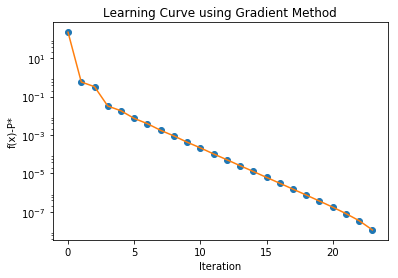

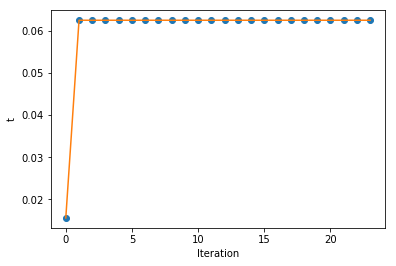

In [712]:
## gradient descent method
fs = []
steps = []

for iter in range(maxiters):
    f = - np.sum(np.log(1-np.dot(A.T,x))) - \
    np.sum(np.log(1+x)) - np.sum(np.log(1-x))
    fs.append(f)
    grad = np.dot(A, (1/(1-np.dot(A.T,x)))) - 1/(1+x) + 1/(1-x)
    v = -grad
    fprime = np.dot(grad.T, v)
    
    if np.linalg.norm(grad) < gradtol:
        break
      
    t = 1 
    while np.amax(np.dot(A.T, (x+t*v))) >= 1 or \
    np.amax(np.absolute(x+t*v)) >= 1:
        t = beta*t
        
    while - np.sum(np.log(1-np.dot(A.T, (x+t*v)))) \
    - np.sum(np.log(1+x+t*v)) \
    - np.sum(np.log(1-x-t*v)) > f + alpha*t*fprime: 
        t = beta*t
    x = x+t*v
    steps.append(t)
    
pstar = fs[len(fs)-1]
print "P*:", pstar
print 

plt.semilogy(range(len(fs)-1), (fs[0:len(fs)-1]-pstar), 'o',
             range(len(fs)-1), (fs[0:len(fs)-1]-pstar), '-')
plt.title('Learning Curve using Gradient Method')
plt.xlabel("Iteration"); plt.ylabel("f(x)-P*")
plt.show()

plt.plot(range(len(steps)), steps, "o", 
         range(len(steps)), steps, "-")
plt.xlabel("Iteration"); plt.ylabel("t")
plt.show()

## Newton's Method

P*: -224.497255475



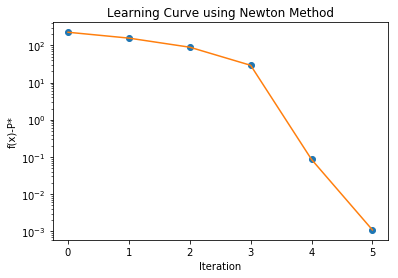

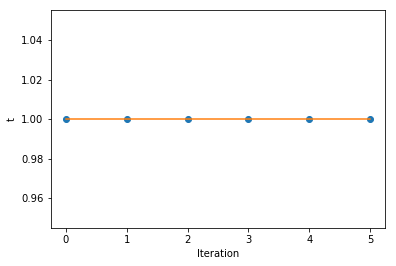

In [713]:
## Newton's Method
fs = []
steps = []
x = np.zeros(n)

for iter in range(maxiters):
    f = - np.sum(np.log(1-np.dot(A.T,x))) - \
    np.sum(np.log(1+x)) - np.sum(np.log(1-x))
    fs.append(f)
    d = 1/(1-np.dot(A.T,x))
    grad = np.dot(A, d) - 1/(1+x) + 1/(1-x)    
    hess = np.dot(A.dot(np.diag(np.diag(np.outer(d,d.T)))), A.T) \
    + np.diag(np.diag(1/np.outer((1+x),(1+x).T) \
                      + 1/np.outer((1-x),(1-x).T)))
    v = - np.linalg.solve(hess, grad)    
    fprime = np.dot(grad.T, v)
    
    if np.absolute(fprime) < nttol:
        break
    
    t = 1 
    while (np.amax(np.dot(A.T, (x+t*v))) >= 1) \
    or (np.amax(np.absolute(x+t*v)) >= 1):
        t = beta*t
        
    while - np.sum(np.log(1-np.dot(A.T, (x+t*v)))) - \
    np.sum(np.log(1+x+t*v)) - \
    np.sum(np.log(1-x-t*v)) > f + alpha*t*fprime: 
        t = beta*t
        
    x = x+t*v
    steps.append(t)

pstar = fs[len(fs)-1]
print "P*:", pstar
print

#print "steps:", steps

plt.semilogy(range(len(fs)-1), (fs[0:len(fs)-1]-pstar), 'o',
             range(len(fs)-1), (fs[0:len(fs)-1]-pstar), '-')
plt.title('Learning Curve using Newton Method')
plt.xlabel("Iteration"); plt.ylabel("f(x)-P*")
plt.show()

plt.plot(range(len(steps)), steps, "o", 
         range(len(steps)), steps, "-")
plt.xlabel("Iteration"); plt.ylabel("t")
plt.show()

# 10.15

In [36]:
# 10.15
n = 100
p = 30
A = np.random.rand(p,n)
## Check A is full rank
print "Rank(A)=", np.linalg.matrix_rank(A)

xhat = np.random.uniform(0,1,n)
x0 = np.ones(n)
b = np.dot(A,xhat)

Rank(A)= 30


## (a) Standard Newton Method

P*: -33.450731312


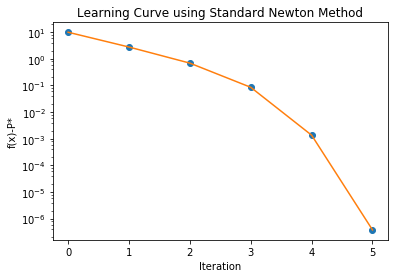

In [37]:
## (a) Standard Newton Method
alpha = 0.01
beta = 0.5
maxiters = 100
nttol = 1e-7

fs = []
x = xhat

for iter in range(maxiters):
    f = np.dot(x.T, np.log(x))
    fs.append(f)
    grad = 1+np.log(x)
    hess = np.diag(1/x)    
    kkt1 = np.concatenate((hess, A.T), axis=1)
    kkt2 = np.concatenate((A, np.zeros((p,p))), axis=1)
    kkt = np.concatenate((kkt1, kkt2), axis=0)
    sol = - np.linalg.solve(kkt,(np.concatenate(\
                                                (grad, np.zeros(p)), \
                                                axis=0)))    
    v = sol[0:n]    
    fprime = np.dot(grad.T, v)
    if np.absolute(fprime) < nttol: 
        break 
        
    t=1
    while np.amin(x+t*v) <= 0: 
        t = beta*t
    while np.dot((x+t*v).T, np.log(x+t*v)) \
    >= f + t*alpha*fprime:
        t = beta*t
        
    x = x + t*v

pstar = fs[len(fs)-1]
print "P*:", pstar

plt.semilogy(range(len(fs)-1), 
             (fs[0:len(fs)-1]-pstar), 'o',
             range(len(fs)-1), 
             (fs[0:len(fs)-1]-pstar), '-')
plt.title('Learning Curve using Standard Newton Method')
plt.xlabel("Iteration"); plt.ylabel("f(x)-P*")
plt.show()


## (b) Infeasible Start Newton Method

p* using feasible start: -33.450731312
p* using infeasible start: -33.450731312


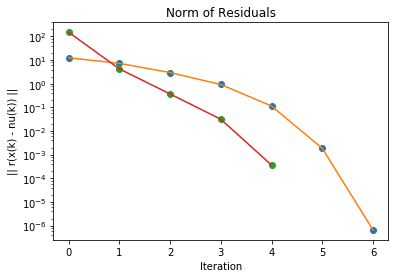

In [42]:
## (b) Infeasible start Newton method
restol = 1e-7

x = xhat ## feasible start
nu = np.zeros(p)
resdls = []

for iter in range(maxiters):
    r = np.concatenate(((1+np.log(x)+np.dot(A.T, nu)), \
                        (np.dot(A,x)-b)), axis=0)
    resdls.append(np.linalg.norm(r))
    kkt1 = np.concatenate((np.diag(1/x), A.T), axis=1)
    kkt2 = np.concatenate((A, np.zeros((p,p))), axis=1)
    kkt = np.concatenate((kkt1, kkt2), axis=0)
    sol = - np.linalg.solve(kkt, r)
    Dx = sol[0:n]
    Dnu = sol[n:(n+p)]
    
    if np.linalg.norm(r) < restol:
        break
    
    t = 1
    while np.amin(x+t*Dx) <= 0:
        t = beta*t
    while np.linalg.norm(np.concatenate \
                          (((1+np.log(x+t*Dx) \
                             +np.dot(A.T, (nu+Dnu))),\
                            (np.dot(A,x+Dx)-b)), axis=0)
                         ) \
          > (1 - alpha*t)*np.linalg.norm(r):
        t = beta*t
    
    x = x + t*Dx
    nu = nu + t*Dnu
        
print "p* using feasible start:", np.dot(x.T, np.log(x))
###########################################
x = x0 ## infeasible start
nu = np.zeros(p)
resdls2 = []

for iter in range(maxiters):
    r = np.concatenate(((1+np.log(x)+np.dot(A.T, nu)), \
                        (np.dot(A,x)-b)), axis=0)
    resdls2.append(np.linalg.norm(r))
    kkt1 = np.concatenate((np.diag(1/x), A.T), axis=1)
    kkt2 = np.concatenate((A, np.zeros((p,p))), axis=1)
    kkt = np.concatenate((kkt1, kkt2), axis=0)
    sol = - np.linalg.solve(kkt, r)
    Dx = sol[0:n]
    Dnu = sol[n:(n+p)]
    
    if np.linalg.norm(r) < restol:
        break
    
    t = 1
    while np.amin(x+t*Dx) <= 0:
        t = beta*t
    while np.linalg.norm(np.concatenate \
                          (((1+np.log(x+t*Dx) \
                             +np.dot(A.T, (nu+Dnu))),\
                            (np.dot(A,x+Dx)-b)), axis=0)
                         ) \
          > (1 - alpha*t)*np.linalg.norm(r):
        t = beta*t
    
    x = x + t*Dx
    nu = nu + t*Dnu

print "p* using infeasible start:", np.dot(x.T, np.log(x))

plt.semilogy(range(len(resdls)-1), 
             (resdls[0:len(resdls)-1]), 'o',
             range(len(resdls)-1), 
             (resdls[0:len(resdls)-1]), '-')
plt.plot(range(len(resdls2)-1), 
             (resdls2[0:len(resdls2)-1]), 'o',
             range(len(resdls2)-1), 
             (resdls2[0:len(resdls2)-1]), '-')

plt.title('Norm of Residuals')
plt.xlabel("Iteration"); plt.ylabel("|| r(x(k) - nu(k)) ||")
plt.show()
    

## (c) Dual Newton Method

g*: -33.450731312


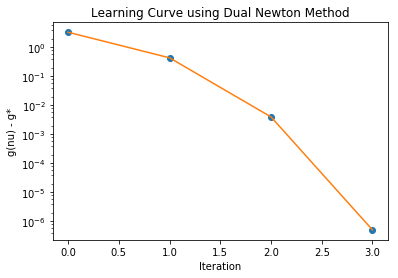

In [43]:
## (c) Dual Newton Method
gs = []
nu = np.zeros(p)

for iter in range(maxiters):
    g = np.dot(b.T, nu) + np.sum(np.exp(-np.dot(A.T, nu)-1))
    gs.append(g)
    grad = b - np.dot(A, np.exp(-np.dot(A.T, nu)-1))
    hess = np.dot(A.dot(np.diag(np.exp(-np.dot(A.T, nu)-1))), A.T)
    v = - np.linalg.solve(hess, grad) 
    fprime = np.dot(grad.T, v)
    
    if np.absolute(fprime) < nttol:
        break
    t = 1
    while np.dot(b.T, (nu+t*v)) + \
    np.sum(np.exp(-np.dot(A.T, (nu+t*v))-1)) \
          > g + t*alpha*fprime:
        t = beta*t
    nu = nu+t*v

gstar = -gs[len(gs)-1]
print "g*:", gstar

plt.semilogy(range(len(gs)-1), (gs[0:len(gs)-1]+gstar), 'o',
             range(len(gs)-1), (gs[0:len(gs)-1]+gstar), '-')
plt.title('Learning Curve using Dual Newton Method')
plt.xlabel("Iteration"); plt.ylabel("g(nu) - g*")
plt.show()


# 11.22

In [44]:
# 11.22
maxiters = 200
alpha = 0.01
beta = 0.5
nttol = 1e-8  
mu = 20
tol = 1e-4 

A = np.matrix([
    [0,-1],[2,-4],[2,1],[-4,4],[-4,0]
])
n = np.shape(A)[1]
m = np.shape(A)[0]

b = np.array([np.ones(5)]).T

Ap = np.fmax(A,0)
Am = np.fmax(-A,0)

r = np.amax(np.dot(Ap, np.ones(n)) + np.dot(Am, np.ones(n)))
u = np.array([(0.5/r)*np.ones(n)]).T
l = np.array([-(0.5/r)*np.ones(n)]).T

In [45]:
t = 1
for iter in range(maxiters): 
    y = b + np.dot(Am,l)-np.dot(Ap,u) 
    val = -t*np.sum(np.log(u-l)) - np.sum(np.log(y))
    grad = (t*np.concatenate((1/(u-l), -1/(u-l)), axis=0) 
            + np.dot(np.concatenate((-Am.T, Ap.T), axis=0),(1/y))) 

    kkt1 = np.concatenate((np.diagflat(np.square(1/(u-l))), 
                           np.diagflat(-np.square(1/(u-l)))), axis = 1)
    kkt2 = np.concatenate((np.diagflat(-np.square(1/(u-l))), 
                           np.diagflat(np.square(1/(u-l)))), axis = 1)
    kkt = np.concatenate((kkt1, kkt2), axis = 0)
  
    hess = t*kkt + np.dot(np.concatenate((-Am.T, Ap.T), axis=0).dot
           (np.diagflat(np.square(1/y))), 
           np.concatenate((-Am, Ap), axis=1))   

    step = - np.linalg.solve(hess, grad) 
    fprime = np.dot(grad.T, step)
    
    if np.absolute(fprime) < nttol:
        gap = (2*m)/t
        print "iter:", str(iter), "; gap:", str(gap)
        if gap < tol:
            break
        t = mu*t
    
    else:
        dl = step[0:n]
        du = step[n:(2*n)]
        dy = np.dot(Am, dl) - np.dot(Ap, du)
        tls = 1
        while (np.amin(np.concatenate(
            (u-l+tls*(du-dl),y+tls*dy), axis = 0)) <= 0):
            tls = beta*tls
    
        while (-t*np.sum(np.log(u-l+tls*(du-dl))) - 
               np.sum(np.log(y+tls*dy)) >= val+tls*alpha*fprime):
            tls = beta*tls
        
        l = l+tls*dl
        u = u+tls*du
                

print "l:", l
print "u:", u

iter: 3 ; gap: 10
iter: 9 ; gap: 0
l: [[ 0.00228159]
 [-0.06305297]]
u: [[ 0.34371329]
 [ 0.23397095]]


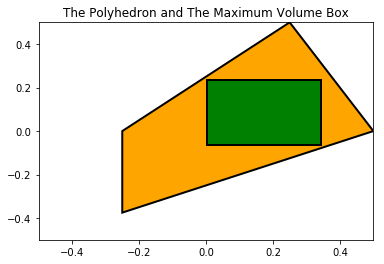

In [27]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
   (-1/4., 0.), (-1/4., -3/8.), (1/2., 0.),(1/4., 1/2.), (-1/4., 0)
    ]
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

verts1 = [
   (0.00228159, -0.06305297), (0.00228159, 0.23397095), 
    (0.34371329, 0.23397095),
    (0.34371329, -0.06305297), (0.34371329, 0.23397095)
    ]
codes1 = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]
path = Path(verts, codes)
path1 = Path(verts1, codes1)
fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)

patch1 = patches.PathPatch(path1, facecolor='green', lw=2)
ax.add_patch(patch1)

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("The Polyhedron and The Maximum Volume Box")
plt.show()